## Demand and Supply analysis for uber

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
pio.templates.default = "plotly_white"
data = pd.read_csv('Uber Request Data.csv')
print(data.head())

   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  


## Cheking null values in our data set

In [74]:
print(data.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


## cheking number of our records

In [75]:
rows=data.shape[0]
columns=data.shape[1]
print(rows)
print(columns)



6745
6


## Cheking basic information about our data set

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## How many trips were completed and cancelled

In [114]:
data.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

## Rename columns for easy manipulation

In [78]:
## first we rename columns in the data set
newData=data.rename(columns={'Request id': 'Request_id', 'Driver id': 'Driver_id','Pickup point':'Pickup_point',
                             'Request timestamp':'Request_timestamp','Drop timestamp':'Drop_timestamp'})
newData.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Number of rides  by each driver  in our data set

In [29]:
rideNum=newData.groupby('Driver_id')['Request_id'].nunique() 
print(rideNum)

Driver_id
1.0      13
2.0      13
3.0      14
4.0      15
5.0      13
         ..
296.0    14
297.0    15
298.0    15
299.0    12
300.0     6
Name: Request_id, Length: 300, dtype: int64


## The driver with the highest number of rides


In [30]:
rideNum=newData.groupby('Driver_id')['Request_id'].nunique() 
print(rideNum.max())

22


## The driver with the lowest number of rides

In [31]:
rideNum=newData.groupby('Driver_id')['Request_id'].nunique() 
print(rideNum.min())

6


## Where did most drop off occur

Dropoff point:
 City       3507
Airport    3238
Name: Pickup_point, dtype: int64
Percantage as per drop: 
 City       52.0
Airport    48.0
Name: Pickup_point, dtype: float64


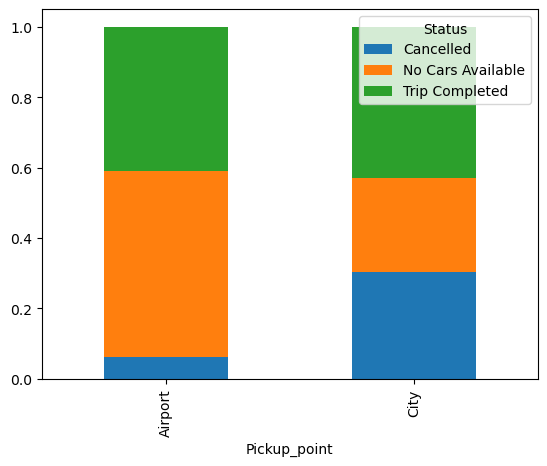

In [113]:
print("Dropoff point:\n", newData.Pickup_point.value_counts())
## percentage of camplete, cancelled and not not availble trips in each pick point
print("Percantage as per drop: \n", round(newData.Pickup_point.value_counts()/newData.Pickup_point.size*100,1))
newData.groupby(by=['Pickup_point'])['Status'].value_counts(normalize=True).unstack('Status').plot.bar(stacked=True);

## Changing pickup and drop time to date format for easy analysis

In [81]:
newData['Request_timestamp'] = pd.to_datetime(newData['Request_timestamp'],
                                       errors='coerce')
newData['Drop_timestamp'] = pd.to_datetime(newData['Drop_timestamp'],
                                     errors='coerce')
newData.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


## Splitting the Reuest time to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [82]:
from datetime import datetime

newData['month'] = pd.DatetimeIndex(newData['Request_timestamp']).month
newData['date'] = pd.DatetimeIndex(newData['Request_timestamp']).date
newData['time'] = pd.DatetimeIndex(newData['Request_timestamp']).hour
 
#changing into categories of day and night
newData['day-night'] = pd.cut(x=newData['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])
newData.head()


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,month,date,time,day-night
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07,11,Afternoon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,2016-11-07,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2016-12-07,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2016-12-07,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2016-07-13,8,Morning


## Percentage of completed , cancelled and not availble trips

Total trips:  6745
Trip Completed       42.0
No Cars Available    39.3
Cancelled            18.7
Name: Status, dtype: float64


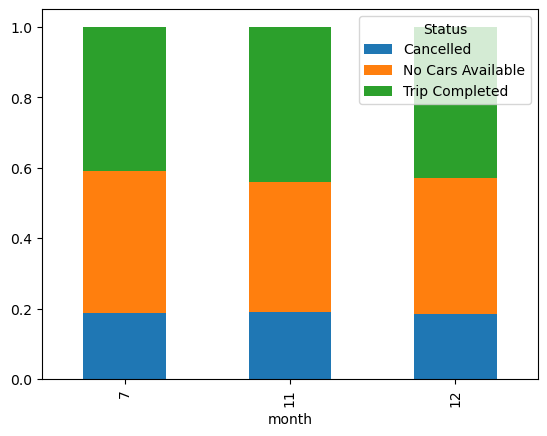

In [83]:
print('Total trips: ', newData.Status.count())
print(round(newData.Status.value_counts()/newData.Status.size*100,1))

newData.groupby(by=['month'])['Status'].value_counts(normalize=True).unstack('Status').plot.bar(stacked=True);


## Droping columns with null values

## Time taken by each ride


In [84]:
newData['Time-diff']=newData['Drop_timestamp'] -newData['Request_timestamp']
newData['Time-diff']=newData['Time-diff'].apply(lambda x: round(x.total_seconds()/60,1))
newData.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,month,date,time,day-night,Time-diff
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,2016-11-07,11,Afternoon,69.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,2016-11-07,17,Evening,50.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2016-12-07,9,Morning,41.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2016-12-07,21,Night,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2016-07-13,8,Morning,52.5


## Which weekdays had the highest rides?

C:\Users\mr bones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

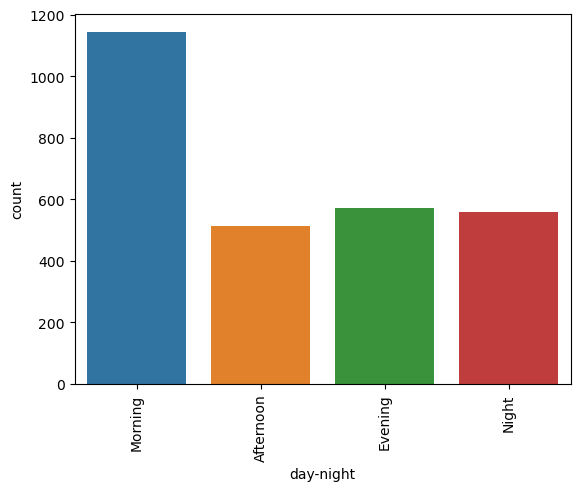

In [39]:
sns.countplot(newData['day-night'])
plt.xticks(rotation=90)

## Which pickup point has the highest rides in a weekday

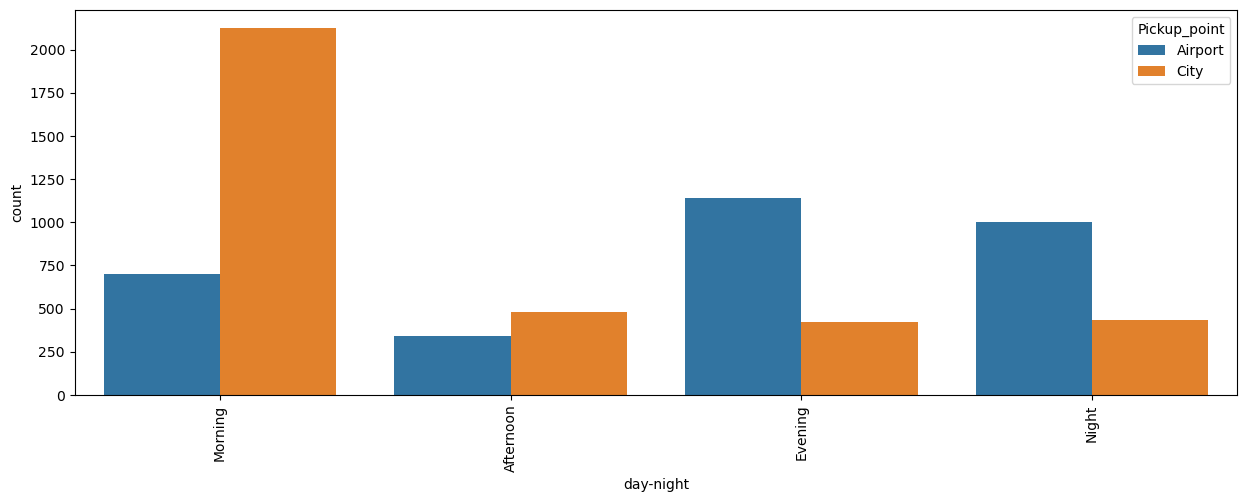

In [116]:
 plt.figure(figsize=(15, 5))
sns.countplot(data=newData, x='day-night', hue='Pickup_point')
plt.xticks(rotation=90)
plt.show()

## checking the relation of trip status and the pickup point

In [119]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['Status', 'Pickup_point']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(newData[object_cols]))
OH_cols.index = newData.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = newData.drop(object_cols, axis=1)
newData = pd.concat([df_final, OH_cols], axis=1)

C:\Users\mr bones\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

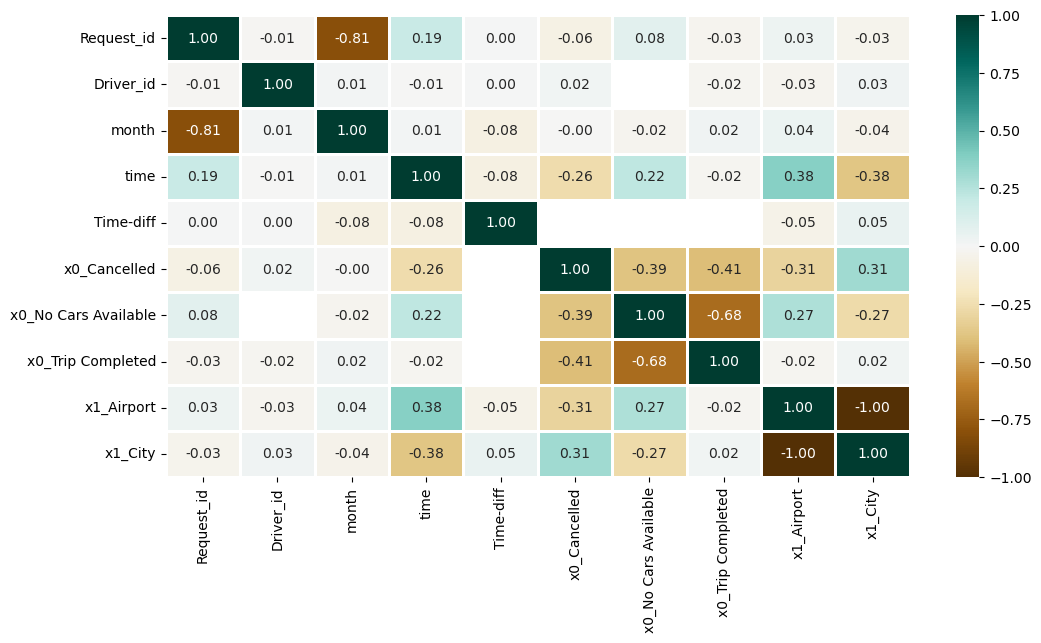

In [120]:
plt.figure(figsize=(12, 6))
sns.heatmap(newData.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)